<a href="https://colab.research.google.com/github/NishantTiwari00786/CS170_Project_2/blob/main/CS170_Project2_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas as pd
import numpy as np
import time


# function for loading dataset

def load_dataset(filename):
  labels = []
  features = []

  with open (filename, 'r') as file:
    for line in file:
      line = line.strip()
      if not line:
        continue #usefil for skipping empty lines
      values = line.strip().split()
      numeric_values = [float(value) for value in values]
      labels.append(numeric_values[0])
      features.append(numeric_values[1:])

  return labels, features


# testing if load_dataset is working or not

'''
filename = '/content/CS170_Large_Data__15.txt'
labels, features = load_dataset(filename)
print('Small labels: ', labels[:10])
print('features:', features[:10])

'''


# Euclidean distance algorithm


# https://www.geeksforgeeks.org/python-numpy/ - I used this link to revise my understanding towards using numpy and then applied it towards writing algorithm for euclidean distance
def euclidean_distance(point1, point2):
  distance = 0.0
  for i in range(len(point1)):
    distance += (point1[i] - point2[i])**2
  return np.sqrt(distance)

# nearest neighbor along with accuracy
# referred to posted video in the dropbox link sent my professor in the email

def one_nearest_neighbor(features, labels, selected_features):
  correct_predictions = 0
  n = len(features)
  for i in range(n):
    test_instance = [features[i][f] for f in selected_features]
    best_distance = float('inf')
    best_label = None
    for j in range(n):
      if i == j:
        continue
      train_instance = [features[j][f] for f in selected_features]
      dist = euclidean_distance(test_instance, train_instance)

      if dist < best_distance:
        best_distance = dist
        best_label = labels[j]

    if best_label == labels[i]:
      correct_predictions += 1

#same formula given in project video
  accuracy = correct_predictions / n
  return accuracy

'''
selected_features = [0, 1, 2, 3, 4, 5]  # Use all 6 features for comparison
acc = one_nearest_neighbor(features, labels, selected_features)
print(f"Accuracy using all features: {acc:.4f}")

'''


#forward selection
# referred to posted video in the dropbox link sent my professor in the email
def forward_selection(features, labels):
    n_features = len(features[0])
    current_features = []
    best_overall_accuracy = 0.0
    best_feature_set = []

    for i in range(n_features):
        feature_to_add = None
        best_accuracy_with_feature = 0.0

        #check for already selected features

        for feature in range(n_features):
            if feature in current_features:
                continue  # skipping already selected features here

            temp_features = current_features + [feature]
            accuracy = one_nearest_neighbor(features, labels, temp_features)
            print(f"Using feature(s) {{{feature + 1}}} accuracy is {accuracy * 100:.1f}%")

          # comparing the accuracy
            if accuracy > best_accuracy_with_feature:
                feature_to_add = feature
                best_accuracy_with_feature = accuracy

        if feature_to_add is not None:
            current_features.append(feature_to_add)
            print(f"Feature set {{{', '.join(str(f + 1) for f in current_features)}}} was best, accuracy is {best_accuracy_with_feature * 100:.1f}%")

            if best_accuracy_with_feature > best_overall_accuracy:
                best_overall_accuracy = best_accuracy_with_feature
                best_feature_set = current_features.copy()

   # print(f"Feature set {{{', '.join(str(f + 1) for f in current_features)}}} was best, accuracy is {best_accuracy_with_feature * 100:.1f}%")
    return best_feature_set, best_overall_accuracy

'''

start_time = time.time()
best_features, best_accuracy = forward_selection(features, labels)
end_time = time.time()
print("\nFinal Best Features:", [f + 1 for f in best_features])
print(f"Final Best Accuracy: {best_accuracy:.4f}")
print(f"Time taken for Forward Selection: {end_time - start_time:.2f} seconds")

'''

#backward selection
# referred to posted video in the dropbox link sent my professor in the email

def backward_elimination(features, labels):
    n_features = len(features[0])
    current_features = list(range(n_features)) # we start with all the features
    best_overall_accuracy = one_nearest_neighbor(features, labels, current_features)
    best_feature_set = current_features.copy()

    print(f"Initial feature set: {[f+1 for f in current_features]}, Accuracy: {best_overall_accuracy:.4f}")

    while len(current_features) > 1:
        feature_to_remove = None
        best_accuracy_without_feature = 0.0

      #check by making a temporary variable and comparing all the possible options
        for feature in current_features:
            temp_features = [f for f in current_features if f != feature]
            accuracy = one_nearest_neighbor(features, labels, temp_features)
            print(f"Using feature(s) {{{feature + 1}}} accuracy is {accuracy * 100:.2f}%")


            if accuracy > best_accuracy_without_feature:
                best_accuracy_without_feature = accuracy
                feature_to_remove = feature

        if feature_to_remove is not None:
            current_features.remove(feature_to_remove)
            print(f"Feature set {{{', '.join(str(f + 1) for f in current_features)}}} was best, accuracy is {best_overall_accuracy * 100:.2f}%")


            if best_accuracy_without_feature > best_overall_accuracy:
                best_overall_accuracy = best_accuracy_without_feature
                best_feature_set = current_features.copy()

   # print(f"Feature set {{{', '.join(str(f + 1) for f in current_features)}}} was best, accuracy is {best_overall_accuracy * 100:.2f}%")
    return best_feature_set, best_overall_accuracy


'''
start_time = time.time()
best_features, best_accuracy = backward_elimination(features, labels)
end_time = time.time()
print("\nFinal Best Features:", [f + 1 for f in best_features])
print(f"Final Best Accuracy: {best_accuracy:.2f}")
print(f"Time taken for Backward Elimination: {end_time - start_time:.4f} seconds")

'''

#referred back to my previous Projects for main inspiration for main layout and tried my best to mimick the given style in the sample project
def main():
  print ("Welcome to Nishant's Feature Selection Algorithm")
  filename = input("Enter the name of the file to test: ")
  labels, features = load_dataset(filename)

  print("\nType the number of algorithm you want to run")
  print("1. Forward Selection")
  print("2. Backward Elimination")
  choice = int(input("Enter your choice: "))

  n_features = len(features[0])
  print(f"Number of features in the dataset: {n_features} (not including the class attribute), with {len(features)} instances.")


  selected_features = list(range(n_features))
  initial_accuracy = one_nearest_neighbor(features, labels, selected_features)
  print(f"\nRunning nearest neighbor with all {n_features} features using leave-one-out evaluation, accuracy is {initial_accuracy * 100:.2f}%")

  print("\n Beginning Search....\n")
  start_time = time.time()

  if choice == 1:
    best_features, best_accuracy = forward_selection(features, labels)
  elif choice == 2:
    best_features, best_accuracy = backward_elimination(features, labels)

  else:
    print("Invalid choice, program exiting")
    return

  end_time = time.time()

  print(f"\nFinished search!! The best feature subset is {[f + 1 for f in best_features]}, with accuracy: {best_accuracy * 100:.2f}%")
  print(f"Total time taken: {end_time - start_time:.2f} seconds")

if __name__ == "__main__":
    main()



Welcome to Nishant's Feature Selection Algorithm
Enter the name of the file to test: /content/CS170_Small_Data__22.txt

Type the number of algorithm you want to run
1. Forward Selection
2. Backward Elimination
Enter your choice: 2
Number of features in the dataset: 6 (not including the class attribute), with 500 instances.

Running nearest neighbor with all 6 features using leave-one-out evaluation, accuracy is 81.40%

 Beginning Search....

Initial feature set: [1, 2, 3, 4, 5, 6], Accuracy: 0.8140
Using feature(s) {1} accuracy is 84.40%
Using feature(s) {2} accuracy is 75.20%
Using feature(s) {3} accuracy is 68.80%
Using feature(s) {4} accuracy is 84.20%
Using feature(s) {5} accuracy is 83.40%
Using feature(s) {6} accuracy is 86.20%
Feature set {1, 2, 3, 4, 5} was best, accuracy is 81.40%
Using feature(s) {1} accuracy is 89.80%
Using feature(s) {2} accuracy is 80.40%
Using feature(s) {3} accuracy is 70.00%
Using feature(s) {4} accuracy is 89.20%
Using feature(s) {5} accuracy is 87.20%

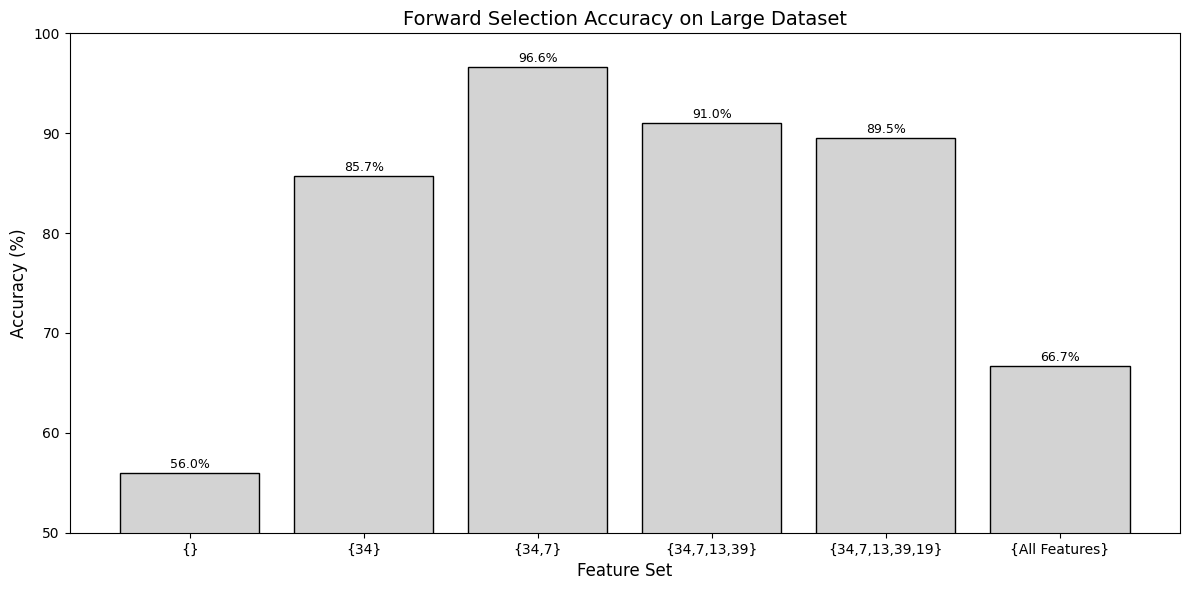

In [ ]:
# https://matplotlib.org/stable/tutorials/pyplot.html - I was familiar with Matplotlib through my previous project experieces but add the link of what I referred to in this project to get idea of plots

import matplotlib.pyplot as plt

feature_sets = [
    "{}",              # empty set
    "{34}",            # First best feature added
    "{34,7}",          # Adding next best feature
    "{34,7,13,39}",    # Midway
    "{34,7,13,39,19}", # Midway
    "{All Features}"   # All features
]


accuracies = [
    56.0,   # Baseline
    85.7,   # Best single feature
    96.6,   # After adding 7
    91.0,   # Midway
    89.5,   # Right before all features
    66.7    # All features
]

plt.figure(figsize=(12, 6))
bars = plt.bar(feature_sets, accuracies, color='lightgray', edgecolor='black')


for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{acc:.1f}%', ha='center', fontsize=9)

plt.xlabel("Feature Set", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Forward Selection Accuracy on Large Dataset", fontsize=14)
plt.ylim(50, 100)
plt.tight_layout()
plt.show()


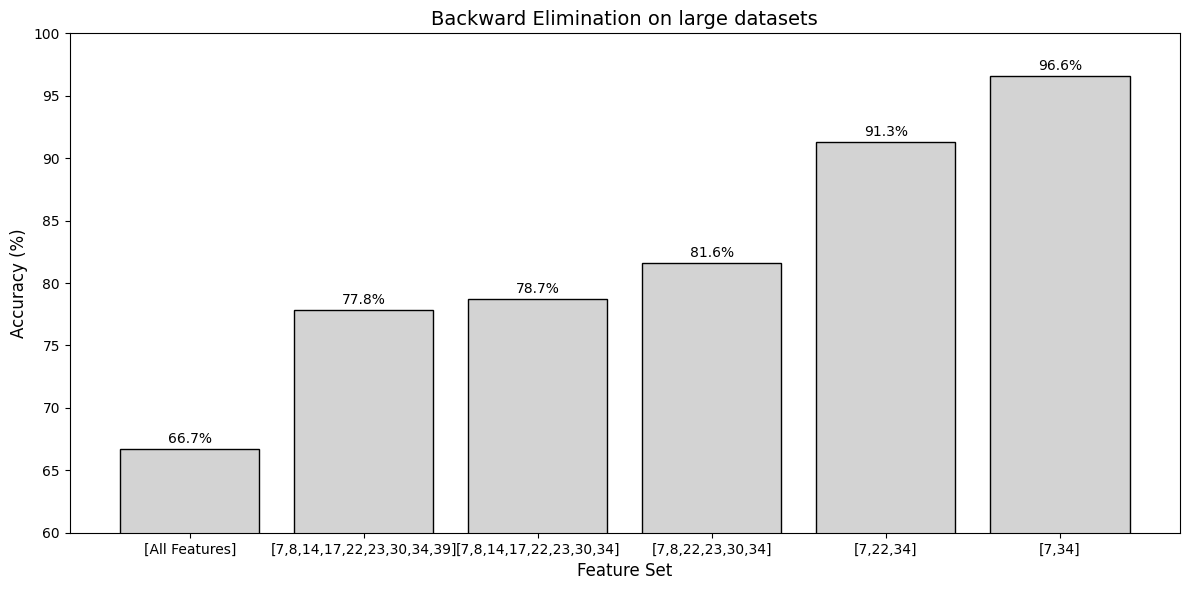

In [ ]:
# https://matplotlib.org/stable/tutorials/pyplot.html - I was familiar with Matplotlib through my previous project experieces but add the link of what I referred to in this project to get idea of plots

import matplotlib.pyplot as plt


feature_sets = [
    "[All Features]",
    "[7,8,14,17,22,23,30,34,39]",
    "[7,8,14,17,22,23,30,34]",
    "[7,8,22,23,30,34]",
    "[7,22,34]",
    "[7,34]"
]

accuracies = [
    66.7,
    77.8,
    78.7,
    81.6,
    91.3,
    96.6
]

plt.figure(figsize=(12, 6))
bars = plt.bar(feature_sets, accuracies, color='lightgray', edgecolor='black')


for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{acc:.1f}%", ha='center', fontsize=10)

plt.xlabel("Feature Set", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Backward Elimination on large datasets", fontsize=14)
plt.ylim(60, 100)
plt.tight_layout()
plt.show()


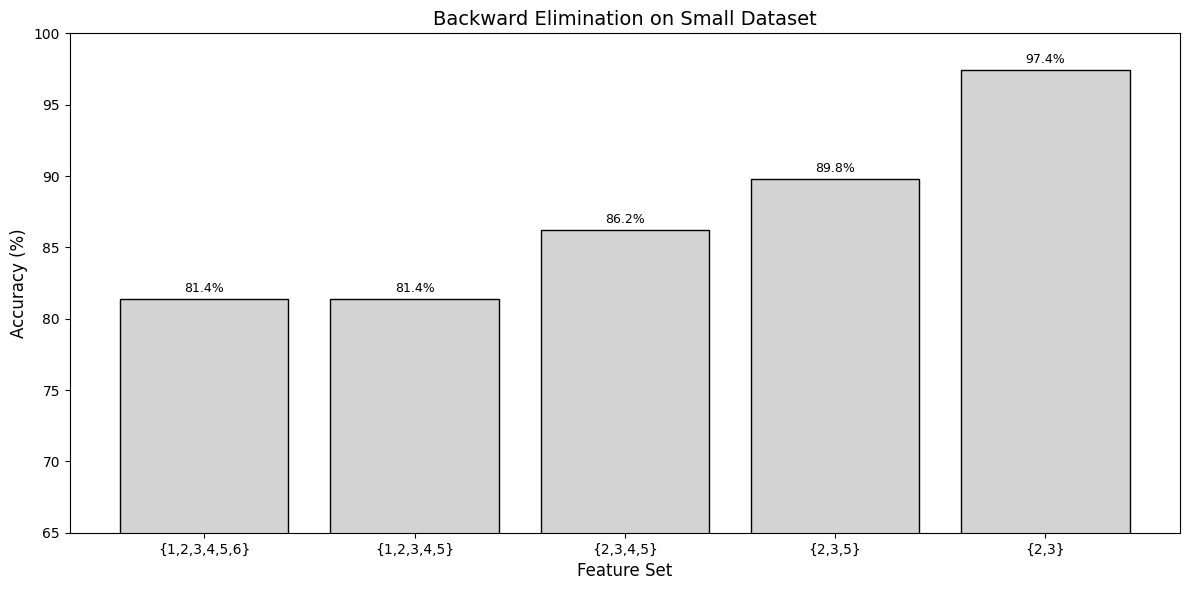

In [ ]:
# https://matplotlib.org/stable/tutorials/pyplot.html - I was familiar with Matplotlib through my previous project experieces but add the link of what I referred to in this project to get idea of plots


import matplotlib.pyplot as plt


feature_sets = [
    "{1,2,3,4,5,6}",
    "{1,2,3,4,5}",
    "{2,3,4,5}",
    "{2,3,5}",
    "{2,3}"
]


accuracies = [
    81.4,
    81.4,
    86.2,
    89.8,
    97.4
]

plt.figure(figsize=(12, 6))
bars = plt.bar(feature_sets, accuracies, color='lightgray', edgecolor='black')


for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{acc:.1f}%', ha='center', fontsize=9)

plt.xlabel("Feature Set", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Backward Elimination on Small Dataset", fontsize=14)
plt.ylim(65, 100)
plt.tight_layout()
plt.show()

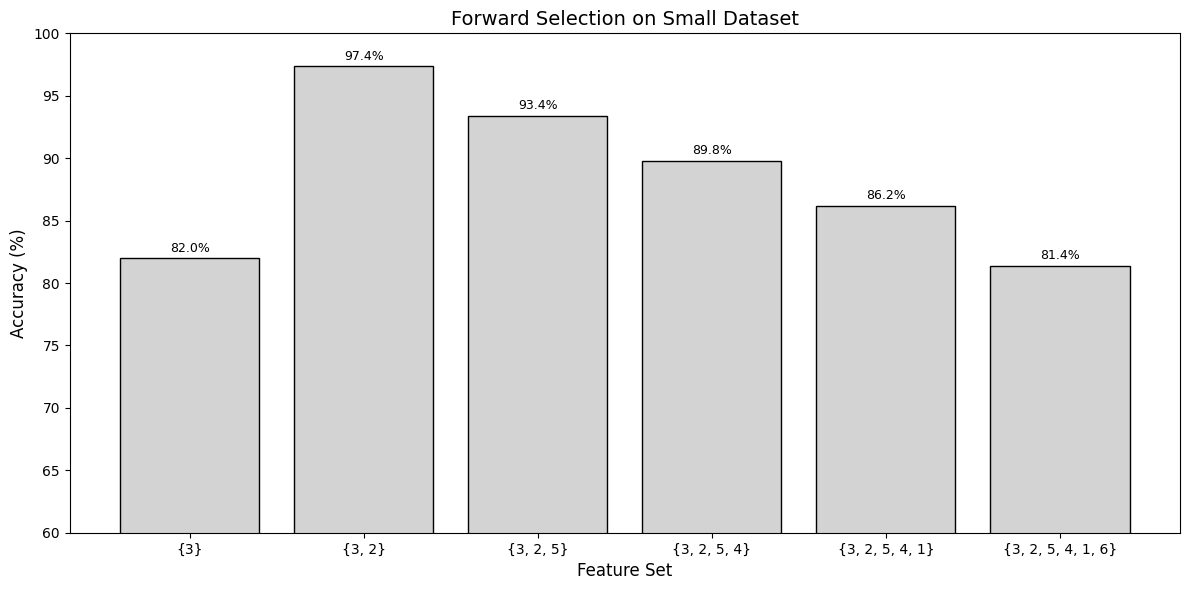

In [ ]:
# https://matplotlib.org/stable/tutorials/pyplot.html - I was familiar with Matplotlib through my previous project experieces but add the link of what I referred to in this project to get idea of plots

import matplotlib.pyplot as plt


feature_sets = [
    "{3}",
    "{3, 2}",
    "{3, 2, 5}",
    "{3, 2, 5, 4}",
    "{3, 2, 5, 4, 1}",
    "{3, 2, 5, 4, 1, 6}"
]

accuracies = [
    82.0,
    97.4,
    93.4,
    89.8,
    86.2,
    81.4
]


plt.figure(figsize=(12, 6))
bars = plt.bar(feature_sets, accuracies, color='lightgray', edgecolor='black')


for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{acc:.1f}%', ha='center', fontsize=9)

plt.xlabel("Feature Set", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Forward Selection on Small Dataset", fontsize=14)
plt.ylim(60, 100)
plt.tight_layout()
plt.show()
